In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'Sex' : 'Gender'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic.describe(include='object')


,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


<Axes: >

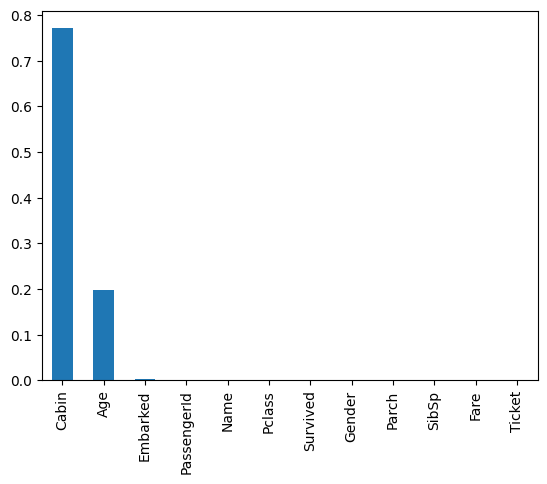

In [6]:
# null check
titanic.isna().mean().sort_values(ascending=False).plot(kind='bar')   # 결측치 비율

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
temp = titanic.isna().mean()
temp[temp>0]

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

<Figure size 400x200 with 0 Axes>

In [14]:
%pip install missingno

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----------- ---------------------------- 11.0/38.5 MB 55.1 MB/s eta 0:00:01
   -------------------------- ------------- 25.2/38.5 MB 60.4 MB/s eta 0:00:01
   -------------------------------------- - 37.2/38.5 MB 61.2 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 52.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]


<Axes: >

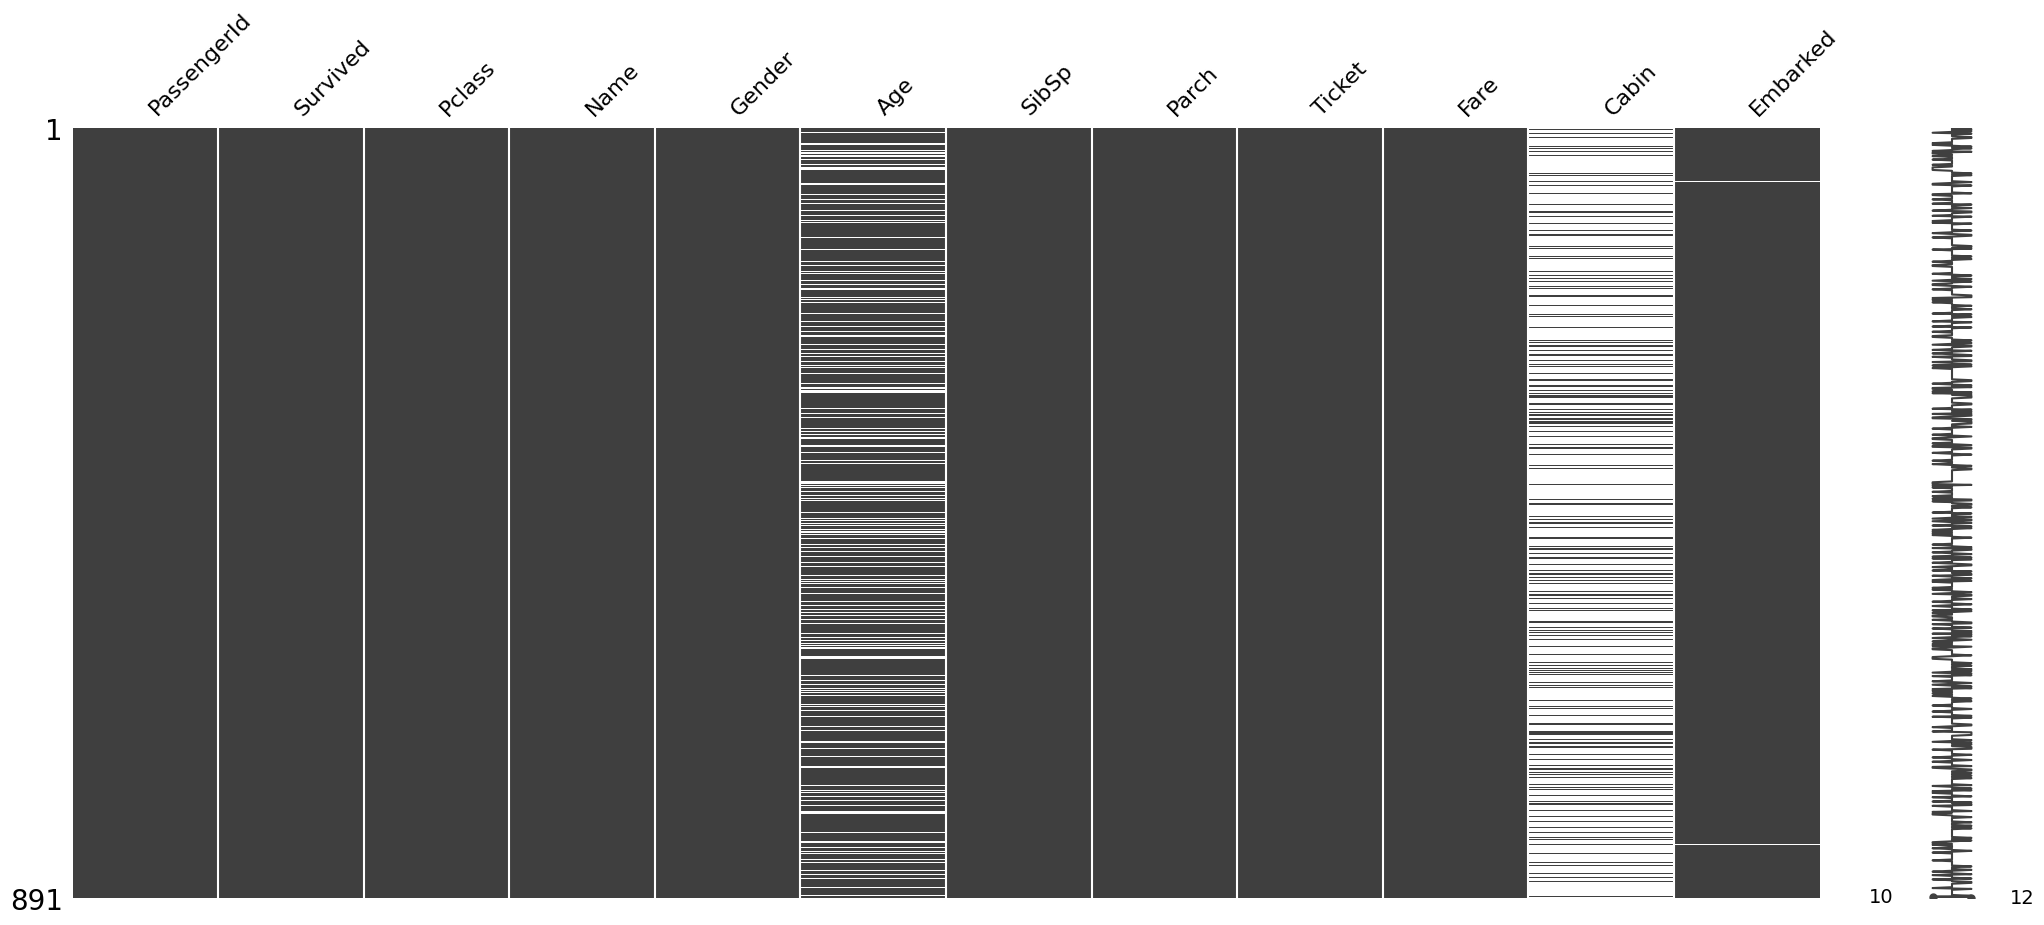

In [17]:
import missingno as msno
msno.matrix(df=titanic)

<Axes: >

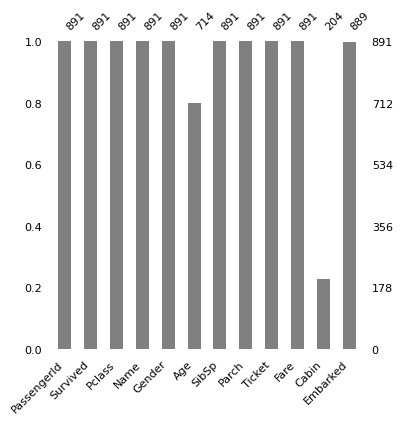

In [18]:
msno.bar(df=titanic, figsize = (4,4), fontsize=8, color=(0.5,0.5,0.5))

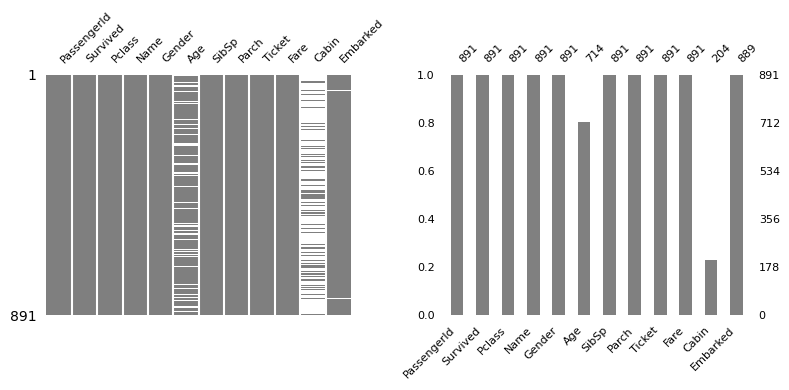

In [ ]:
import missingno as msno

fig, axes = plt.subplots(1,2,figsize=(8,4))


msno.matrix(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[0],sparkline=False)
msno.bar(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
# age컬럼의 결측치가 있는 모든 row를 출력
import numpy as np
test = pd.DataFrame({
    'a' : [1,np.nan,6,np.nan],
    'b' : [2,5,6,np.nan],
    'c' : [3,5,9,3]
})
test
test[test.isna().any(axis=1)] # 행마다 결측치가 하나라도 있으면 출력되는 것

,a,b,c
1,NaN,5.0,5
3,NaN,NaN,3


In [ ]:
missing_df = titanic[titanic.drop(columns=['Cabin']).isna().any(axis=1)]
missing_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [27]:
# Embarked 가 결측치인 row 데이터를 출력
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [31]:
k = 3
df_lists = []
for i in titanic[titanic.Embarked.isna()].index:
    df_lists.append(titanic.loc[i-k : i+k])

pd.concat(df_lists)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


c:\source\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\source\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\source\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\source\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\source\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\source\.venv\Lib\site-packages

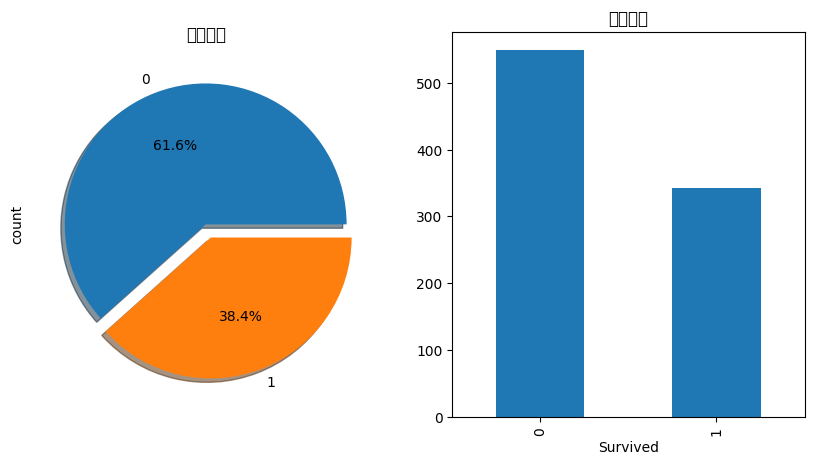

In [40]:
# 생존유무  pie 그래프
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('생존확율')
titanic.Survived.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode = [0,0.1],ax=ax[0])

ax[1].set_title('생존인원')
titanic.Survived.value_counts().plot(kind='bar',ax=ax[1])
plt.show()

In [41]:
# 선실등급별 생존유무
titanic.groupby('Pclass')[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [42]:
pd.crosstab(titanic['Pclass'], titanic['Survived'],margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [36]:
import seaborn as sns

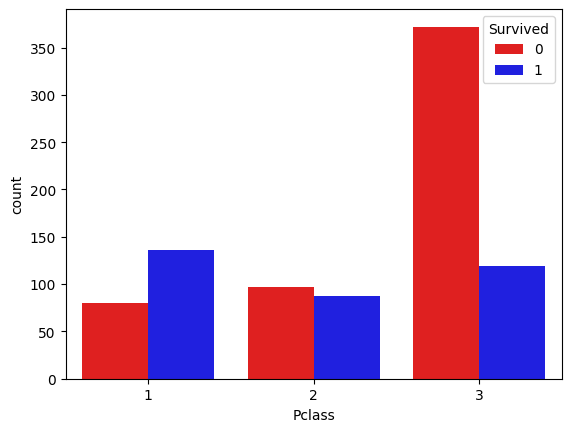

In [43]:
sns.countplot(data=titanic,x='Pclass',hue='Survived', palette=['red','blue'],)
plt.show()


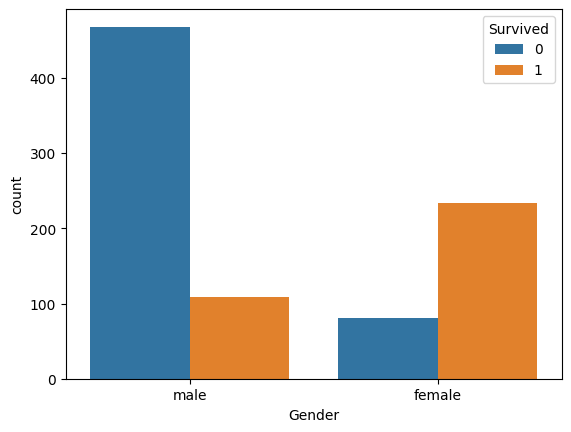

In [44]:
sns.countplot(data=titanic,x='Gender',hue='Survived')
plt.show()

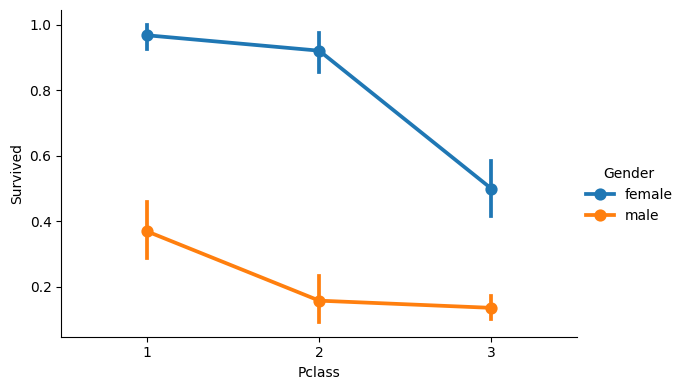

In [45]:
# 선실등급별, 성별에 따라서 생존확률이 다르다는것을 알수 있음.. 
# 두 특성을 한꺼번에 비교하는 시각화 툴
# factorplot
sns.catplot(data=titanic,x='Pclass',y='Survived',hue='Gender',kind='point',height=4,aspect=1.5)
plt.show()

In [46]:
# 나이가 가장 어린 승객, 높은 승객, 평균나이
titanic.Age.max(),titanic.Age.min(),titanic.Age.mean()

(np.float64(80.0), np.float64(0.42), np.float64(29.69911764705882))

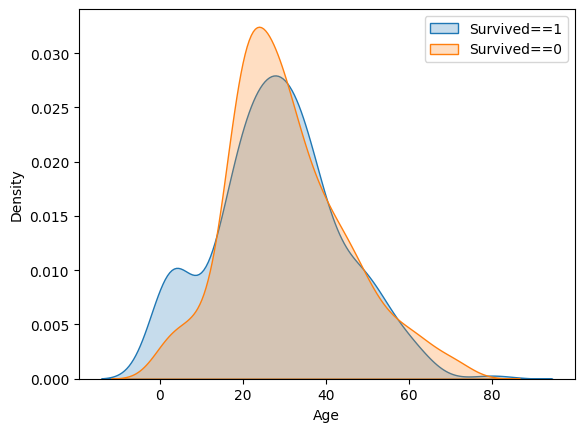

In [47]:
sns.kdeplot(
    data = titanic[titanic.Survived == 1], x='Age', label = 'Survived==1',fill=True
)

sns.kdeplot(
    data = titanic[titanic.Survived == 0], x='Age', label = 'Survived==0',fill=True
)
plt.legend(loc='best')
plt.show()

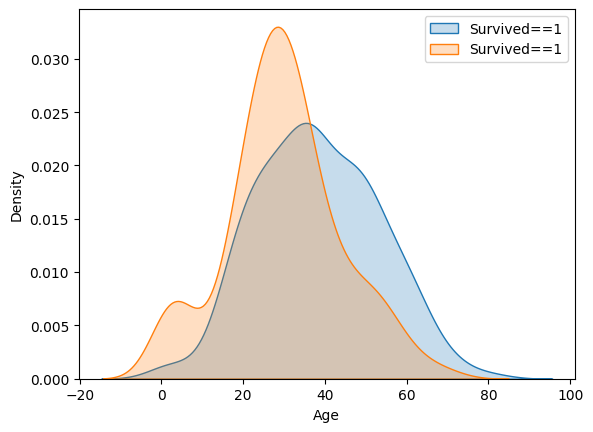

In [52]:
# 위의 표를 응용하여 Pclass에 따른 생존여부 시각화

sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age', label = 'Survived==1',fill=True
)

sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age', label = 'Survived==1',fill=True
)
plt.legend(loc='best')
plt.show()

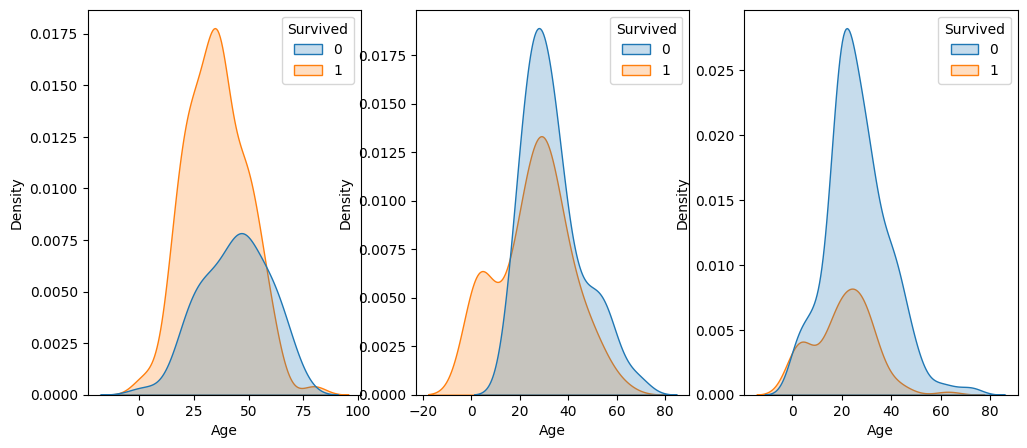

In [53]:
# 위의 표를 응용해서  Pclass별로 생존유무에대한 시각화
f, ax = plt.subplots(1,3,figsize=(12,5))
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[0]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[1]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age', hue='Survived', label = 'Pclass==1',fill=True, ax=ax[2]
)
plt.show()

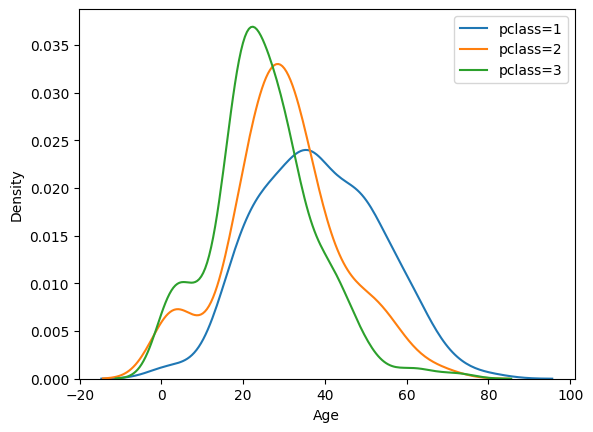

In [54]:
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age',label = 'pclass=1'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age',label = 'pclass=2'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age',label = 'pclass=3'
)
plt.legend()
plt.show()

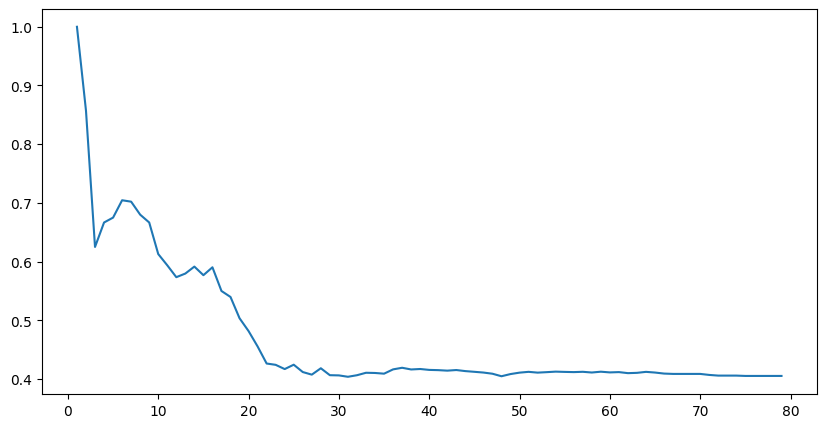

In [55]:
# 나이대의 범위를 점점 넓혀가면서 생존률의 변화
plt.figure(figsize=(10,5))      
multi_age_range = [titanic[titanic.Age<i].Survived.mean() for i in range(1,80)]
plt.plot(range(1,80), multi_age_range)    
plt.show()